In [3]:
import matplotlib.pyplot as plt
temp = [30, 32, 33, 28.5, 35, 29, 29]
ice_creams_count = [100, 115, 115, 75, 125, 79, 89]
plt.scatter(temp, ice_creams_count)
plt.title("Temperature vs. Sold ice creams")
plt.xlabel("Temperature")
plt.ylabel("Sold ice creams count")
plt.show()

<Figure size 640x480 with 1 Axes>

Text(0,0.5,'$\\pi(x)$')

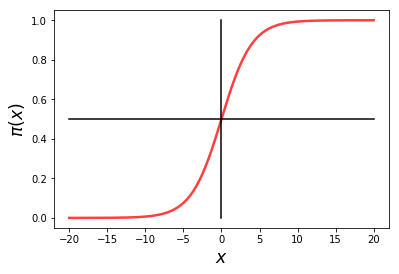

In [4]:

'''
L O G I S T I C   R E G R E S S I O N
Adapted From example given in Chapter 4 of 
Introduction to Statistical Learning
Data: Default Data Set
'''

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

'''
QUIZ: UNDERSTANDING THE BASIC SHAPE
http://matplotlib.org/users/mathtext.html
'''
x = np.linspace(-20, 20, 1000)
#print (x)
beta = [0, 0.5]
y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))

# Plotting
plt.plot(x, y, 'r', alpha=0.75, linewidth=2.5)
plt.plot([0,0], [0, 1], 'k')
plt.plot([-20,20], [0.5, 0.5], 'k')
plt.xlabel(r'$x$', fontsize='xx-large')
plt.ylabel(r'$\pi(x)$', fontsize='xx-large')


In [5]:
'''
PART I - Exploration
'''
# 1 - Read in Default.csv and convert all data to numeric
d = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT3/master/data/Default.csv')
d.head()
d.describe()
# Convert everything to numeric before splitting
d.student = np.where(d.student == 'Yes', 1, 0)
(d.head())


,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


(7000, 4)
(3000, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026068BF1A20>,
      dtype=object)

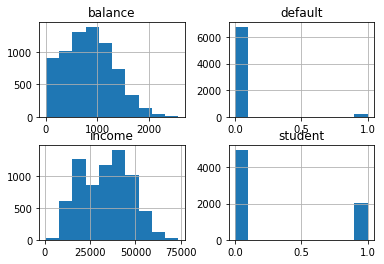

In [6]:
# 2 - Split the data into train and test sets
X = d[['balance','student','income']]
y = d.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert them back into dataframes, for convenience
train = pd.DataFrame(data=X_train, columns=['balance','student','income'])
train['default'] = y_train
test = pd.DataFrame(data=X_test, columns=['balance','student','income'])
test['default'] = y_test
print (train.shape)
print (test.shape)
# 3 - Create a histogram of all variables
train.hist()

(0, 2800)

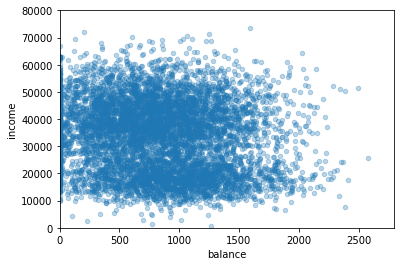

In [7]:
# 4 - Create a scatter plot of the income vs. balance
train.plot(x='balance', y='income', kind='scatter', alpha=0.3)
plt.ylim([0,80000]); plt.xlim([0, 2800])

In [8]:
train.default.value_counts()

0    6758
1     242
Name: default, dtype: int64

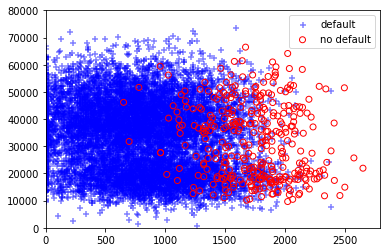

In [9]:

# 5 - Mark defaults with a different color and symbol
train_nd = d[d.default == 0]
train_d = d[d.default == 1]

plt.figure()
plt.scatter(train_nd.balance, train_nd.income, alpha = .5, marker='+', c= 'b')

plt.scatter(train_d.balance, train_d.income, marker='o',edgecolors = 'r', facecolors = 'none')
plt.ylim([0,80000]); plt.xlim([0, 2800])
plt.legend( ('default', 'no default'), loc='upper right')

# 6 - What can you infer from this plot?
# It appears that the balance is more correlated with default than income


In [10]:
train.corr()

,balance,student,income,default
balance,1.000000,0.200048,-0.145408,0.358880
student,0.200048,1.000000,-0.754429,0.025096
income,-0.145408,-0.754429,1.000000,-0.010217
default,0.358880,0.025096,-0.010217,1.000000


In [11]:
import statsmodels.formula.api as sm
from statsmodels import PytestTester
model =sm.Logit(y_train,X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.126547
         Iterations 9


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Sep 2018   Pseudo R-squ.:                  0.1580
Time:                        06:47:58   Log-Likelihood:                -885.83
converged:                       True   LL-Null:                       -1052.0
                                        LLR p-value:                 6.577e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0029      0.000     19.207      0.000       0.003       0.003
student       -3.8834      0.183    -21.242      0.000      -4.242      -3.525
income        -0.0002   6.18e-06    -28.329      0.000      -0.000      -0.000
==============================================================================
"""

In [13]:
coefficients = result.params
coefficients

balance    0.002896
student   -3.883360
income    -0.000175
dtype: float64

In [14]:
#Intervalo de Confianza
result.conf_int()

,0,1
balance,0.002601,0.003192
student,-4.241674,-3.525046
income,-0.000187,-0.000163


Tome la exponencial de cada uno de los coeficientes para generar los odds ratios.

Esto le indica cómo un aumento o disminución de una unidad en una variable afecta las probabilidades de ser admitido.

Por ejemplo, podemos esperar que las probabilidades de ser admitido aumenten aproximadamente igual para ambos mejores resultados de los exámenes.

In [15]:
# odds ratios and 95% CI
confidenceInterval = result.conf_int()
confidenceInterval['OddsRatio'] = coefficients
confidenceInterval.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(confidenceInterval)

,2.5%,97.5%,OddsRatio
balance,1.002604,1.003197,1.002900
student,0.014383,0.029450,0.020582
income,0.999813,0.999837,0.999825


Trazar el límite de decisión

Podemos usar estos parámetros beta para trazar el límite de decisión en los datos de entrenamiento. Solo necesitamos dos puntos para trazar una línea, por lo que elegimos dos puntos finales: el mínimo y el máximo entre los datos de entrenamiento X que ya calculamos en el ejemplo anterior.

In [16]:
plot_x = np.array([ 95.60854757,  21.63578984])


In [18]:
line_intercept = -coefficients['balance'] / coefficients['income']
line_slope = -coefficients['income'] / coefficients['income']
line_intercept

16.547176064058778

In [19]:
line_slope


-1.0

Ahora tenemos todo para trazar el límite:

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
colours = ['red' if i==0 else 'green' for i in y] # red not admitted, green yes.
#Crea una lista de valores en la mejor línea de ajuste
plot_y = [line_slope * i + line_intercept for i in plot_x]
plot_y

[-79.06137150594122, -5.088613775941223]

La línea azul es nuestro límite de decisión: cuando la puntuación de tus exámenes se encuentra debajo de la línea, entonces probablemente (esa es la predicción) no serás admitido en la Universidad. Si mienten arriba, probablemente lo harás. Como puede ver, el límite no está prediciendo perfectamente en los datos históricos de entrenamiento. Es un modelo. No perfecto pero útil. Lo que podemos hacer es medir su precisión.

Text(0.5,0.98,'Student admission vs. past two exams')

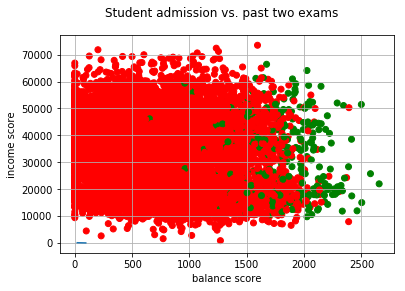

In [21]:
fig,ax = plt.subplots()
ax.scatter(X.balance, X.income, c=colours)
ax.plot(plot_x, plot_y)
ax.grid(True)
ax.set_xlabel("balance score")
ax.set_ylabel("income score")
fig.suptitle("Student admission vs. past two exams")

In [22]:
def logPredict(modelParams, X):  
    probabilities = modelParams.predict(X)
    return [1 if x >= 0.5 else 0 for x in probabilities]

In [26]:
predictions  = logPredict(result, X)

accuracy = np.mean(predictions == y)
print ('accuracy = {0}%'.format(accuracy*100)  )

accuracy = 96.11%


Solo por diversión, digamos que mis puntajes son 40 en el primer examen y 78 en el segundo:

In [27]:
myExams = pd.DataFrame({'balance': [40.], 'income': [78.], 'intercept': [1.]})
myExams

,balance,income,intercept
0,40.0,78.0,1.0


Uh oh, parece que mi probabilidad de ser admitido en la universidad es solo del 23% 

In [28]:
print ('Your probability = {0}%'.format(result.predict(myExams)[0]*100))

Your probability = 3.1734916238560193e-130%


In [29]:
'''
PART II - LOGISTIC REGRESSION
'''

# 1 - Run a logistic regression on the balance variable
# 2 - Is the beta  value associated with balance significant?
balance = LogisticRegression()
balance.fit(train[['balance']], y_train)
B1 = balance.coef_[0][0]
B0 = balance.intercept_[0]
print (np.exp(B1))


1.0043072246086282


[0 1]


C:\Users\juand\AppData\Roaming\Python\Python35\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\juand\AppData\Roaming\Python\Python35\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\juand\AppData\Roaming\Python\

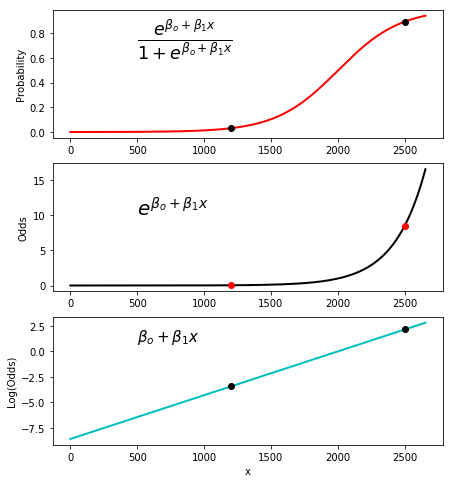

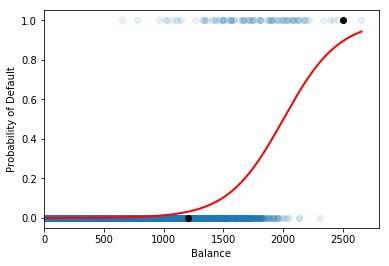

In [30]:

# Beta is significant!
# 2 - Predict the probability of default for someone with a balance of $1.2k and $2.5k
prob = balance.predict(pd.DataFrame({'balance': [1200, 2500]}))
print(prob)
# What does beta mean? Let's create some plots to find out!
x = np.linspace(test.balance.min(), test.balance.max(),500)
beta = [B0,B1]

y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))
odds = np.exp(beta[0] + beta[1]*x)
log_odds = beta[0] + beta[1]*x

plt.figure(figsize=(7, 8))
plt.subplot(311)
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{e^{\beta_o + \beta_1x}}{1+e^{\beta_o + \beta_1x}}$', fontsize=25)

plt.subplot(312)
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 10, r'$e^{\beta_o + \beta_1x}$', fontsize=20)

plt.subplot(313)
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 1, r'$\beta_o + \beta_1x$', fontsize=15)


'''
From Page 133 in "Introduction to Statistical Learning"
...increasing X by one unit changes the log odds by β1, or equivalently 
it multiplies the odds by e^β1 . However,because the relationship between 
p(X) and X in is not a straight line,β1 does not correspond to the change 
in p(X) associated with a one-unit increase in X. The amount that 
p(X) changes due to a one-unit change in X will depend on the current 
value of X.
Example: In our example, β1 = 0.0042979750671040349 ~= 0.0043
Log-odds: 
If you increase x by 1, you increase the log-odds by 0.0043. 
If you increase x by 800, you increase the log-odds by 0.0043*800 = 3.44
If you increase x by 1, you multiply the odds by e^0.0043. 
If you increase x by 800, you mutliply the odds by e^(0.0043*800) = 31.187, not 800 * e^(0.0043)
'''

# Now let's try plotting some points
plt.subplot(311)
pts = np.array([1200, 2500])
ypts = np.exp(beta[0] + beta[1]*pts) / (1 + np.exp(beta[0] + beta[1]*pts))
plt.plot(pts, ypts, 'ko')

plt.subplot(312)
odds_pts = np.exp(beta[0] + beta[1]*pts)
plt.plot(pts, odds_pts, 'ro')

plt.subplot(313)
log_odds_pts = beta[0] + beta[1]*pts
plt.plot(pts, log_odds_pts , 'ko')



# 3 - Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])
plt.plot([1200, 2500], prob, 'ko')

# 4 - Create predictions using the balance model on the test set
test['pred_class'] = balance.predict(test[['balance']])

# 5 - Compute the overall accuracy, the sensitivity and specificity
# Accuracy
accuracy = sum(test.pred_class == test.default) / float(len(test.default))

# Specificity
# For those who didn't default, how many did it predict correctly?
test_nd = test[test.default == 0]
specificity = sum(test_nd.pred_class == test_nd.default) / float(len(test_nd.default))

# Sensitivity
# For those who did default, how many did it predict correctly? 
test_d = test[test.default == 1]
sensitivity = sum(test_d.pred_class == test_d.default) / float(len(test_d.default))

# This raises the question, how does our overall 
# classification accuracy compare to the not-default rate?
null = 1 - sum(d.default) / float(len(d.default))

# This illustrates an important point, class imbalance can result in accuracy
# measures that are missleading. After all, if you would have just guessed not
# going to default, you would be correct 96.67 % of the time.

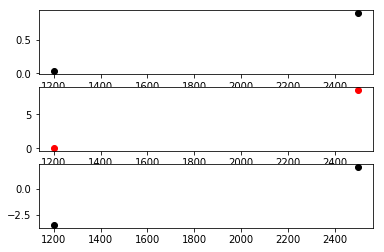

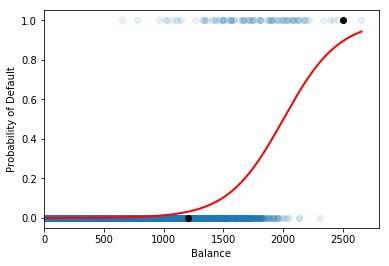

In [31]:

# Now let's try plotting some points
plt.subplot(311)
pts = np.array([1200, 2500])
ypts = np.exp(beta[0] + beta[1]*pts) / (1 + np.exp(beta[0] + beta[1]*pts))
plt.plot(pts, ypts, 'ko')

plt.subplot(312)
odds_pts = np.exp(beta[0] + beta[1]*pts)
plt.plot(pts, odds_pts, 'ro')

plt.subplot(313)
log_odds_pts = beta[0] + beta[1]*pts
plt.plot(pts, log_odds_pts , 'ko')



# 3 - Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])
plt.plot([1200, 2500], prob, 'ko')

# 4 - Create predictions using the balance model on the test set
test['pred_class'] = balance.predict(test[['balance']])

# 5 - Compute the overall accuracy, the sensitivity and specificity
# Accuracy
accuracy = sum(test.pred_class == test.default) / float(len(test.default))

# Specificity
# For those who didn't default, how many did it predict correctly?
test_nd = test[test.default == 0]
specificity = sum(test_nd.pred_class == test_nd.default) / float(len(test_nd.default))

# Sensitivity
# For those who did default, how many did it predict correctly? 
test_d = test[test.default == 1]
sensitivity = sum(test_d.pred_class == test_d.default) / float(len(test_d.default))

# This raises the question, how does our overall 
# classification accuracy compare to the not-default rate?
null = 1 - sum(d.default) / float(len(d.default))

# This illustrates an important point, class imbalance can result in accuracy
# measures that are missleading. After all, if you would have just guessed not
# going to default, you would be correct 96.67 % of the time.

In [32]:

## READING IN THE DATA

# read tab-separated file using pandas
import pandas as pd
df = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/sms.tsv',
                   sep='\t', header=None, names=['label', 'msg'])
print (df)
# examine the data
df.head(30)
df.label.value_counts()
df.msg.describe()

# convert label to a binary variable
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1)
X_train.shape
X_test.shape


## COUNTVECTORIZER: 'convert text into a matrix of token counts'
## http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer

# start with a simple example
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']

# learn the 'vocabulary' of the training data
vect = CountVectorizer()
vect.fit(train_simple)
vect.get_feature_names()

# transform training data into a 'document-term matrix'
train_simple_dtm = vect.transform(train_simple)
train_simple_dtm
train_simple_dtm.toarray()

# examine the vocabulary and document-term matrix together
pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

# transform testing data into a document-term matrix (using existing vocabulary)
test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())


## REPEAT PATTERN WITH SMS DATA

# instantiate the vectorizer
vect = CountVectorizer()

# learn vocabulary and create document-term matrix in a single step
train_dtm = vect.fit_transform(X_train)
train_dtm

# transform testing data into a document-term matrix
test_dtm = vect.transform(X_test)
test_dtm

# store feature names and examine them
train_features = vect.get_feature_names()
len(train_features)
train_features[:50]
train_features[-50:]

# convert train_dtm to a regular array
train_arr = train_dtm.toarray()
train_arr


## SIMPLE SUMMARIES OF THE TRAINING DATA

# refresher on numpy
import numpy as np
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr[0, 0]
arr[1, 3]
arr[0, :]
arr[:, 0]
np.sum(arr)
np.sum(arr, axis=0)
np.sum(arr, axis=1)

# exercise: calculate the number of tokens in the 0th message in train_arr
sum(train_arr[0, :])

# exercise: count how many times the 0th token appears across ALL messages in train_arr
sum(train_arr[:, 0])

# exercise: count how many times EACH token appears across ALL messages in train_arr
np.sum(train_arr, axis=0)

# exercise: create a DataFrame of tokens with their counts
train_token_counts = pd.DataFrame({'token':train_features, 'count':np.sum(train_arr, axis=0)})
train_token_counts.sort_index(by='count', ascending=False)


## MODEL BUILDING WITH NAIVE BAYES
## http://scikit-learn.org/stable/modules/naive_bayes.html

# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train)

# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)
preds

# compare predictions to true labels
from sklearn import metrics

print (metrics.accuracy_score(y_test, preds))
print (metrics.confusion_matrix(y_test, preds))

# predict (poorly calibrated) probabilities and calculate AUC
probs = nb.predict_proba(test_dtm)[:, 1]
probs
print (metrics.roc_auc_score(y_test, probs))

# exercise: show the message text for the false positives
X_test[y_test < preds]

# exercise: show the message text for the false negatives
X_test[y_test > preds]


## COMPARE NAIVE BAYES AND LOGISTIC REGRESSION
## USING ALL DATA AND CROSS-VALIDATION

# create a document-term matrix using all data
all_dtm = vect.fit_transform(df.msg)

# instantiate logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# compare AUC using cross-validation
# note: this is slightly improper cross-validation... can you figure out why?
from sklearn.cross_validation import cross_val_score
cross_val_score(nb, all_dtm, df.label, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, all_dtm, df.label, cv=10, scoring='roc_auc').mean()


## EXERCISE: CALCULATE THE 'SPAMMINESS' OF EACH TOKEN

# create separate DataFrames for ham and spam
df_ham = df[df.label==0]
df_spam = df[df.label==1]

# learn the vocabulary of ALL messages and save it
vect.fit(df.msg)
all_features = vect.get_feature_names()

# create document-term matrix of ham, then convert to a regular array
ham_dtm = vect.transform(df_ham.msg)
ham_arr = ham_dtm.toarray()

# create document-term matrix of spam, then convert to a regular array
spam_dtm = vect.transform(df_spam.msg)
spam_arr = spam_dtm.toarray()

# count how many times EACH token appears across ALL messages in ham_arr
ham_counts = np.sum(ham_arr, axis=0)

# count how many times EACH token appears across ALL messages in spam_arr
spam_counts = np.sum(spam_arr, axis=0)

# create a DataFrame of tokens with their separate ham and spam counts
all_token_counts = pd.DataFrame({'token':all_features, 'ham':ham_counts, 'spam':spam_counts})

# add one to ham counts and spam counts so that ratio calculations (below) make more sense
all_token_counts['ham'] = all_token_counts.ham + 1
all_token_counts['spam'] = all_token_counts.spam + 1

# calculate ratio of spam-to-ham for each token
all_token_counts['spam_ratio'] = all_token_counts.spam / all_token_counts.ham
all_token_counts.sort_index(by='spam_ratio')

     label                                                msg
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

C:\Users\juand\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:103: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


0.9885139985642498
[[1203    5]
 [  11  174]]
0.986643100053696


C:\Users\juand\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:186: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


,ham,spam,token,spam_ratio
3684,319,1,gt,0.003135
4793,317,1,lt,0.003155
3805,232,1,he,0.004310
6843,168,1,she,0.005952
4747,163,1,lor,0.006135
2428,151,1,da,0.006623
4550,136,1,later,0.007353
1247,90,1,ask,0.011111
6626,90,1,said,0.011111
2714,89,1,doing,0.011236


In [33]:
from sklearn.linear_model import Lasso
Lasso?

In [35]:
## TASK: Searching for optimal parameters
## FUNCTION: GridSearchCV
## DOCUMENTATION: http://scikit-learn.org/stable/modules/grid_search.html
## DATA: Titanic (n=891, p=5 selected, type=classification)
## DATA DICTIONARY: https://www.kaggle.com/c/titanic-gettingStarted/data

# read in and prepare titanic data
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/titanic.csv')
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})
titanic.age.fillna(titanic.age.mean(), inplace=True)
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# define X and y
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']
X = titanic[feature_cols]
y = titanic.survived

# use cross-validation to find best max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

# try max_depth=2
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc').mean()

# try max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc').mean()

# use GridSearchCV to automate the search
from sklearn.grid_search import GridSearchCV
treeclf = DecisionTreeClassifier(random_state=1)
max_depth_range = range(1, 21)
param_grid = {max_depth=max_depth_range}
grid = GridSearchCV(treeclf, param_grid=param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

# plot the results
import matplotlib.pyplot as plt
plt.plot(max_depth_range, grid_mean_scores)

# what was best?
grid.best_score_
grid.best_params_
grid.best_estimator_

# search a "grid" of parameters
max_depth_range = range(1, 21)
min_samples_leaf_range = range(1, 11)
param_grid = dict(max_depth=max_depth_range, min_samples_leaf=min_samples_leaf_range)
grid = GridSearchCV(treeclf, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)
grid.best_score_
grid.best_params_


## TASK: Standardization of features (aka "center and scale" or "z-score normalization")
## FUNCTION: StandardScaler
## DOCUMENTATION: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
## EXAMPLE: http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/preprocessing/about_standardization_normalization.ipynb
## DATA: Wine (n=178, p=2 selected, type=classification)
## DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Wine

# sample data
train = pd.DataFrame({'A':[40,50,60], 'B':[0.90,0.30,0.60], 'C':[0,0.20,0.80], 'label':[0,1,2]})
oos = pd.DataFrame({'A':[54.9], 'B':[0.59], 'C':[0.79]})

# define X and y
X = train[['A','B','C']]
y = train.label

# KNN with k=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# what "should" it predict? what does it predict?
knn.predict(oos)

# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# compare original to standardized
X.values
X_scaled

# figure out how it standardized
scaler.mean_
scaler.std_
(X.values-scaler.mean_) / scaler.std_

# try this on real data
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, usecols=[0,10,13])
wine.columns=['label', 'color', 'proline']
wine.head()
wine.describe()

# define X and y
X = wine[['color', 'proline']]
y = wine.label

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# check that it worked properly
X_train_scaled[:, 0].mean()
X_train_scaled[:, 0].std()
X_train_scaled[:, 1].mean()
X_train_scaled[:, 1].std()

# standardize X_test
X_test_scaled = scaler.transform(X_test)

# is this right?
X_test_scaled[:, 0].mean()
X_test_scaled[:, 0].std()
X_test_scaled[:, 1].mean()
X_test_scaled[:, 1].std()

# compare KNN accuracy on original vs scaled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)


## TASK: Chaining steps
## FUNCTION: Pipeline
## DOCUMENTATION: http://scikit-learn.org/stable/modules/pipeline.html
## DATA: Wine (n=178, p=2 selected, type=classification)
## DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Wine

# here is proper cross-validation on the original (unscaled) data
X = wine[['color', 'proline']]
y = wine.label
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

# why is this improper cross-validation on the scaled data?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

# fix this using Pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

# using GridSearchCV with Pipeline
n_neighbors_range = range(1, 21)
param_grid = dict(kneighborsclassifier__n_neighbors=n_neighbors_range)
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
grid.best_score_
grid.best_params_


## TASK: Regularized regression
## FUNCTIONS: Ridge, RidgeCV, Lasso, LassoCV
## DOCUMENTATION: http://scikit-learn.org/stable/modules/linear_model.html
## DATA: Crime (n=319 non-null, p=122, type=regression)
## DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

# read in data, remove categorical features, remove rows with missing values
crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None, na_values=['?'])
crime = crime.iloc[:, 5:]
crime.dropna(inplace=True)

# define X and y
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
?
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

# try a smaller alpha
las = Lasso(alpha=0.0001, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))

# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
lascv = LassoCV(normalize=True)
lascv.fit(X_train, y_train)
lascv.alpha_
lascv.coef_
preds = lascv.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))


## TASK: Regularized classification
## FUNCTION: LogisticRegression
## DOCUMENTATION: http://scikit-learn.org/stable/modules/linear_model.html
## DATA: Titanic (n=891, p=5 selected, type=classification)
## DATA DICTIONARY: https://www.kaggle.com/c/titanic-gettingStarted/data

# define X and y
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']
X = titanic[feature_cols]
y = titanic.survived

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.coef_

# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
logreg = LogisticRegression(C=0.5, penalty='l2')
logreg.fit(X_train, y_train)
logreg.coef_

# pipeline with scaling to select best C and penalty
pipe = make_pipeline(StandardScaler(), LogisticRegression())
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1', 'l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)
grid.best_score_
grid.best_params_


## TASK: Feature selection
## FUNCTIONS: RFE, RFECV
## DOCUMENTATION: http://scikit-learn.org/stable/modules/feature_selection.html
## DATA: Crime (n=319 non-null, p=122, type=regression)
## DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

# define X and y
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# select "best" features (half of them by default)
lm = LinearRegression()
from sklearn.feature_selection import RFE
selector = RFE(lm)
selector.fit(X_train, y_train)
selector.n_features_
selector.support_
selector.ranking_

# let RFECV select the "optimal" number of features
from sklearn.feature_selection import RFECV
selector = RFECV(lm, cv=3, scoring='mean_squared_error')
selector.fit(X, y)
selector.n_features_
selector.support_
selector.ranking_

# *tentative* advice for usage:
# 1. scale features, then use RFECV to select the number of features (p)
# 2. build pipeline: feature scaling, select p features using RFE, model
# 3. GridSearchCV to select optimal parameters

SyntaxError: invalid syntax (<ipython-input-35-eb89ee277084>, line 36)

In [36]:
#https://github.com/Mashimo/datascience/tree/master/01-Regression